# FIFA 19 Complete Player Analysis

<img src = "https://cdn02.nintendo-europe.com/media/images/10_share_images/games_15/nintendo_switch_4/H2x1_NSwitch_EASportsFifa19_image1600w.jpg">

FIFA 19 is a football simulation video game developed by EA Vancouver as part of Electronic Arts' FIFA series. It is the 26th installment in the FIFA series, and was released on 28 September 2018 for PlayStation 3, PlayStation 4, Xbox 360, Xbox One, Nintendo Switch, and Microsoft Windows.The game features the UEFA club competitions for the first time, including the UEFA Champions League and UEFA Europa League and the UEFA Super Cup as well.

As with FIFA 18, Cristiano Ronaldo featured as the cover athlete of the regular edition: however, following his unanticipated transfer from Spanish club Real Madrid to Italian side Juventus, new cover art was released. He also appeared with Neymar in the cover of the Champions edition. From February 2019, an updated version featured Neymar, Kevin De Bruyne and Paulo Dybala on the cover of the regular edition.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

import warnings
warnings.filterwarnings('ignore')

from pylab import rcParams

%matplotlib inline
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/fifa19/data.csv


In [2]:
fifa = pd.read_csv('/kaggle/input/fifa19/data.csv')
fifa

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
5,5,183277,E. Hazard,27,https://cdn.sofifa.org/players/4/19/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,91,Chelsea,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,€172.1M
6,6,177003,L. Modrić,32,https://cdn.sofifa.org/players/4/19/177003.png,Croatia,https://cdn.sofifa.org/flags/10.png,91,91,Real Madrid,...,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,€137.4M
7,7,176580,L. Suárez,31,https://cdn.sofifa.org/players/4/19/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,91,91,FC Barcelona,...,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,€164M
8,8,155862,Sergio Ramos,32,https://cdn.sofifa.org/players/4/19/155862.png,Spain,https://cdn.sofifa.org/flags/45.png,91,91,Real Madrid,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,€104.6M
9,9,200389,J. Oblak,25,https://cdn.sofifa.org/players/4/19/200389.png,Slovenia,https://cdn.sofifa.org/flags/44.png,90,93,Atlético Madrid,...,70.0,27.0,12.0,18.0,86.0,92.0,78.0,88.0,89.0,€144.5M


FIFA 19 Player Dataset consists of 18207 players and their field attributes distributed over 89 fields.

In [3]:
fifa.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


These are the top 5 players in FIFA 19

In [4]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
Unnamed: 0                  18207 non-null int64
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Photo                       18207 non-null object
Nationality                 18207 non-null object
Flag                        18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Club Logo                   18207 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Special                     18207 non-null int64
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null fl

In [5]:
fifa.describe()

,Unnamed: 0,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,9103.000000,214298.338606,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,...,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,5256.052511,29965.244204,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,...,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,0.000000,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4551.500000,200315.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,9103.000000,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,13654.500000,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,18206.000000,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


In [6]:
fifa.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

Some fields like Photo, Flag, Club logo are not relevent so I will drop them.

In [7]:
fifa.drop(['Unnamed: 0','Photo','Flag','Club Logo'], axis = 1, inplace = True)

In [8]:
fifa.columns

Index(['ID', 'Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club',
       'Value', 'Wage', 'Special', 'Preferred Foot',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate',
       'Body Type', 'Real Face', 'Position', 'Jersey Number', 'Joined',
       'Loaned From', 'Contract Valid Until', 'Height', 'Weight', 'LS', 'ST',
       'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM',
       'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB',
       'RCB', 'RB', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing',
       'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing',
       'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions',
       'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking

In [9]:
fifa.shape

(18207, 85)

In [10]:
fifa.nunique()

ID                18207
Name              17194
Age                  29
Nationality         164
Overall              48
                  ...  
GKHandling           70
GKKicking            79
GKPositioning        79
GKReflexes           76
Release Clause     1244
Length: 85, dtype: int64

In [11]:
#Looking for missing values
fifa.isnull().any()

ID                False
Name              False
Age               False
Nationality       False
Overall           False
                  ...  
GKHandling         True
GKKicking          True
GKPositioning      True
GKReflexes         True
Release Clause     True
Length: 85, dtype: bool

In [12]:
#Missing value count in each field
fifa.isnull().sum()

ID                   0
Name                 0
Age                  0
Nationality          0
Overall              0
                  ... 
GKHandling          48
GKKicking           48
GKPositioning       48
GKReflexes          48
Release Clause    1564
Length: 85, dtype: int64

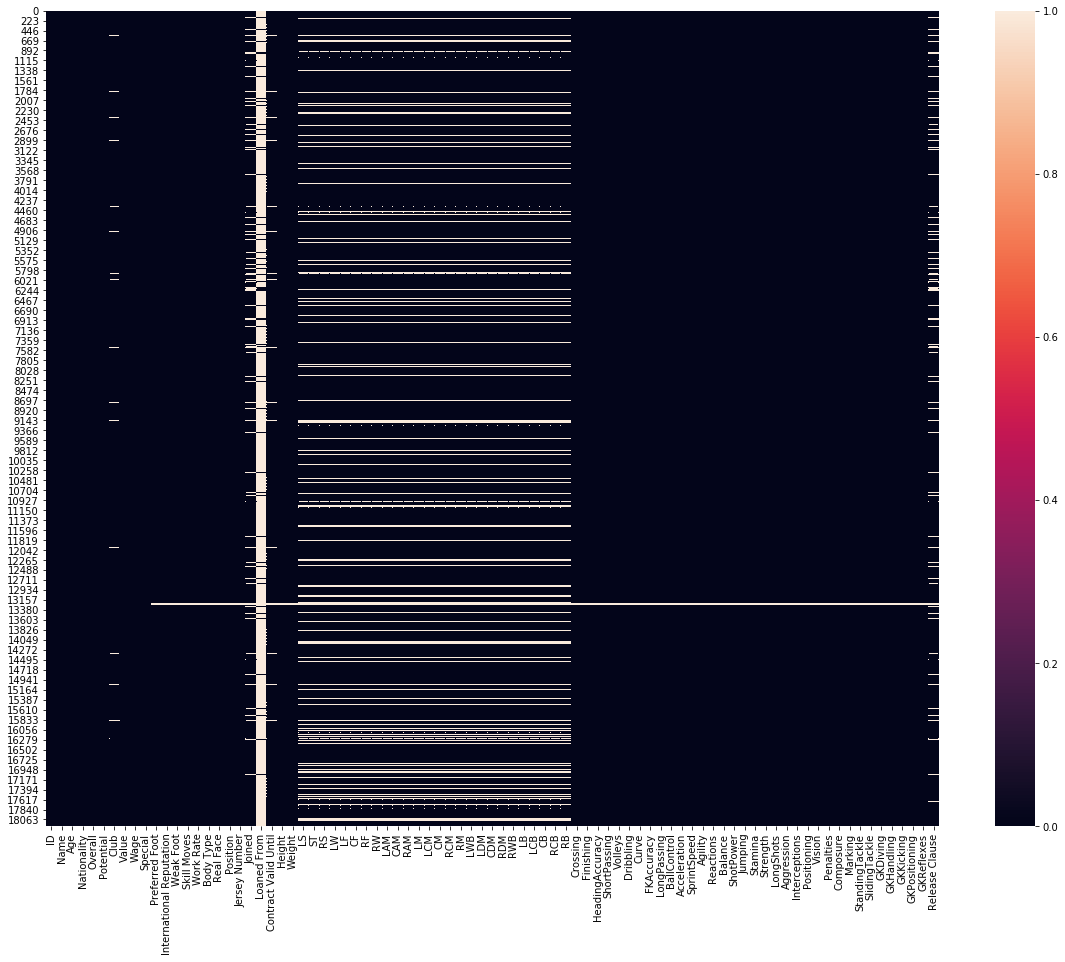

In [13]:
#Heat map of missing values
plt.rcParams['figure.figsize'] = (20, 15)
sb.heatmap(pd.isnull(fifa))

From the heatmap I can conclude that 'Loaned From' has large amount of missing data and position based records also have a significant amount of missing data.

## Correlation Heatmap of Player Stats

Text(0.5, 1.0, 'Correlation Heatmap')

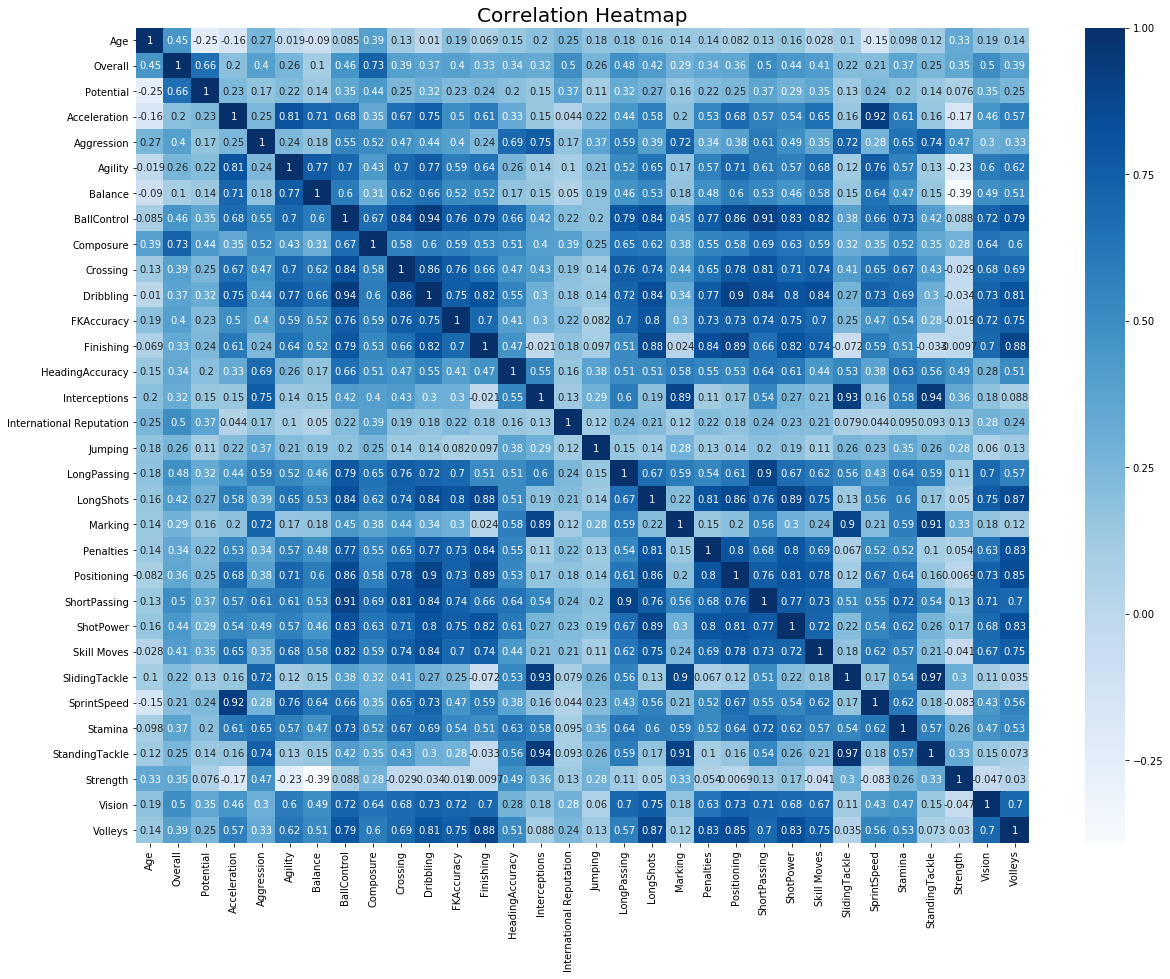

In [14]:
plt.rcParams['figure.figsize'] = (20,15)
sb.heatmap(fifa[['Age', 'Overall', 'Potential', 'Value', 'Wage',
                'Acceleration', 'Aggression', 'Agility', 'Balance', 'BallControl', 
                'Body Type','Composure', 'Crossing','Dribbling', 'FKAccuracy', 'Finishing', 
                'HeadingAccuracy', 'Interceptions','International Reputation',
                'Joined', 'Jumping', 'LongPassing', 'LongShots',
                'Marking', 'Penalties', 'Position', 'Positioning',
                'ShortPassing', 'ShotPower', 'Skill Moves', 'SlidingTackle',
                'SprintSpeed', 'Stamina', 'StandingTackle', 'Strength', 'Vision',
                'Volleys']].corr(), annot = True,  cmap = 'Blues')
plt.title('Correlation Heatmap', size = 20)

## Age Analysis

Text(0.5, 1.0, 'Count of players')

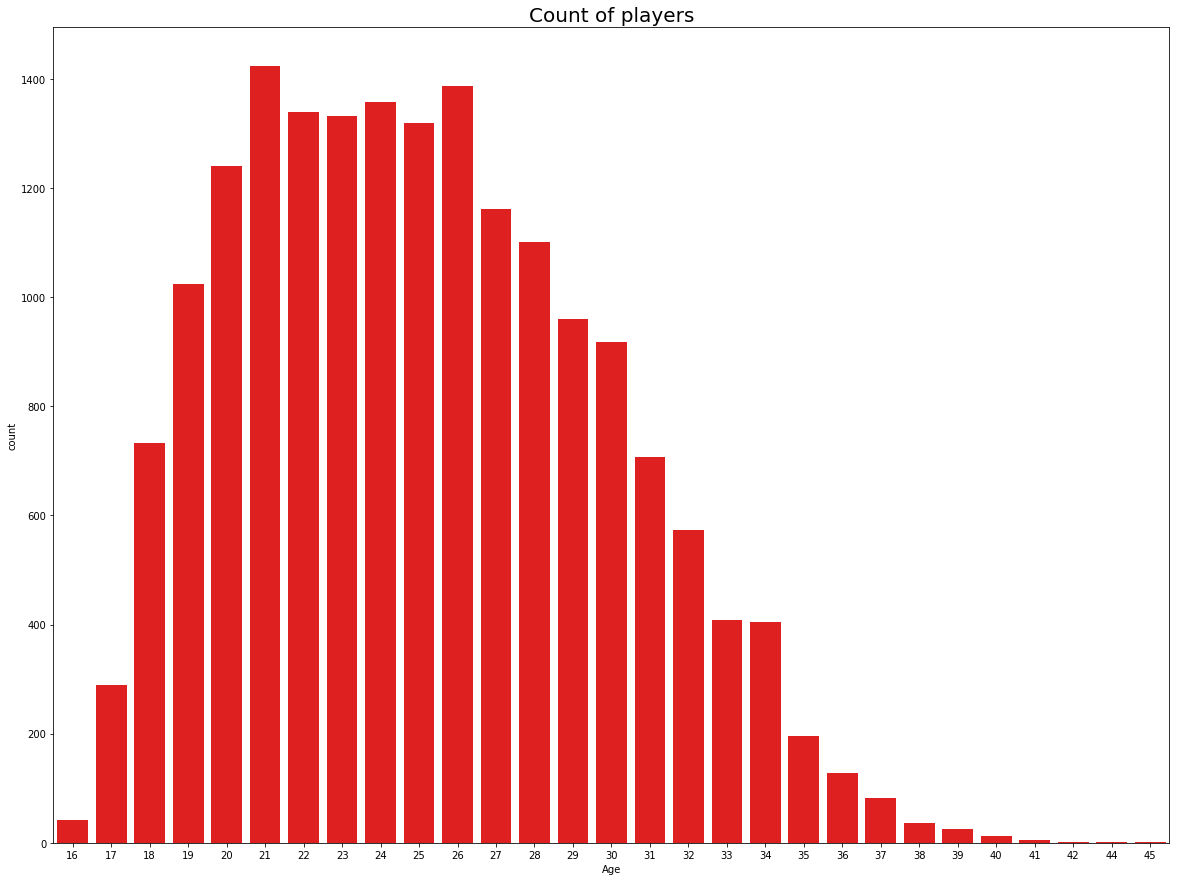

In [15]:
sb.countplot(fifa['Age'], color = 'r')
plt.title('Count of players', size = 20)

From the Age analysis I can that most of the players are aged between 19 to 28 Years. 

In [16]:
#Eldest Player
eldest = fifa.sort_values('Age', ascending = False)[['Name', 'Nationality', 'Age','Overall']]
eldest.set_index('Name', inplace = True)
eldest.head(10)

,Nationality,Age,Overall
Name,,,
O. Pérez,Mexico,45,71
K. Pilkington,England,44,48
T. Warner,Trinidad & Tobago,44,53
S. Narazaki,Japan,42,65
C. Muñoz,Argentina,41,68
J. Villar,Paraguay,41,77
H. Sulaimani,Saudi Arabia,41,63
M. Tyler,England,41,59
B. Nivet,France,41,71


These are the top 10 eldest players. The eldest player is 45 years old

In [17]:
#Youngest Player
youngest = fifa.sort_values('Age', ascending = True)[['Name', 'Nationality', 'Age','Overall']]
youngest.set_index('Name', inplace = True)
youngest.head(10)

,Nationality,Age,Overall
Name,,,
G. Nugent,England,16,46
J. Olstad,Norway,16,52
H. Massengo,France,16,62
J. Italiano,Australia,16,58
N. Ayéva,Sweden,16,48
K. Broda,Poland,16,53
L. D'Arrigo,Australia,16,54
Y. Verschaeren,Belgium,16,62
B. Nygren,Sweden,16,56


These are the top 10 young players. The youngest player is 16 years old

## Position Analysis

Text(0.5, 1.0, 'Count of Players in each Position')

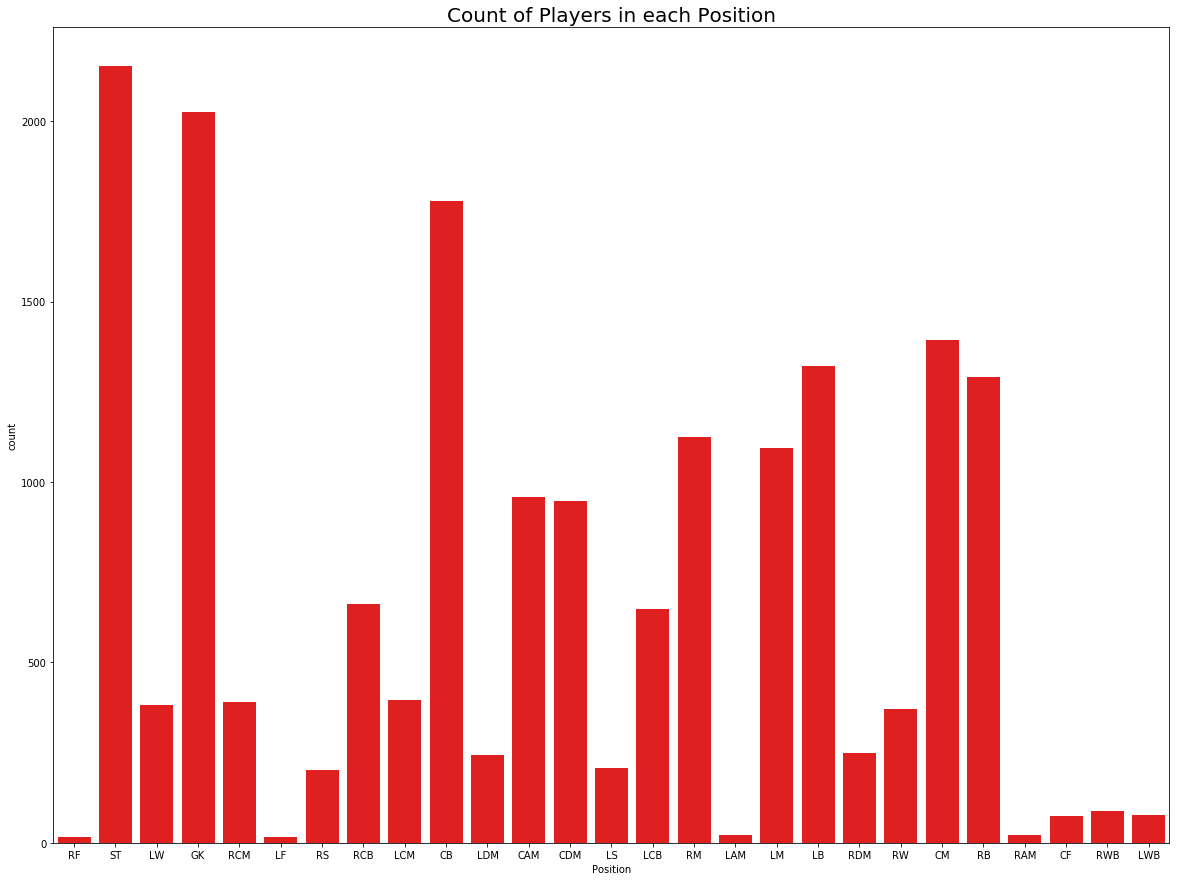

In [18]:
sb.countplot(fifa['Position'], color = 'r')
plt.title('Count of Players in each Position', size = 20)

In [19]:
# Top players for each position
tp = fifa.loc[fifa.groupby(fifa['Position'])['Overall'].idxmax()]
tp1 = pd.DataFrame(tp, columns = ['Name', 'Position', 'Overall'])
tp1

,Name,Position,Overall
17,A. Griezmann,CAM,89
12,D. Godín,CB,90
20,Sergio Busquets,CDM,89
271,Luis Alberto,CF,82
67,Thiago,CM,86
3,De Gea,GK,91
28,J. Rodríguez,LAM,88
35,Marcelo,LB,88
24,G. Chiellini,LCB,89
11,T. Kroos,LCM,90


## Comparison between Age and Overall

Text(0.5, 1.0, 'Scatterplot of Players Age and Overall')

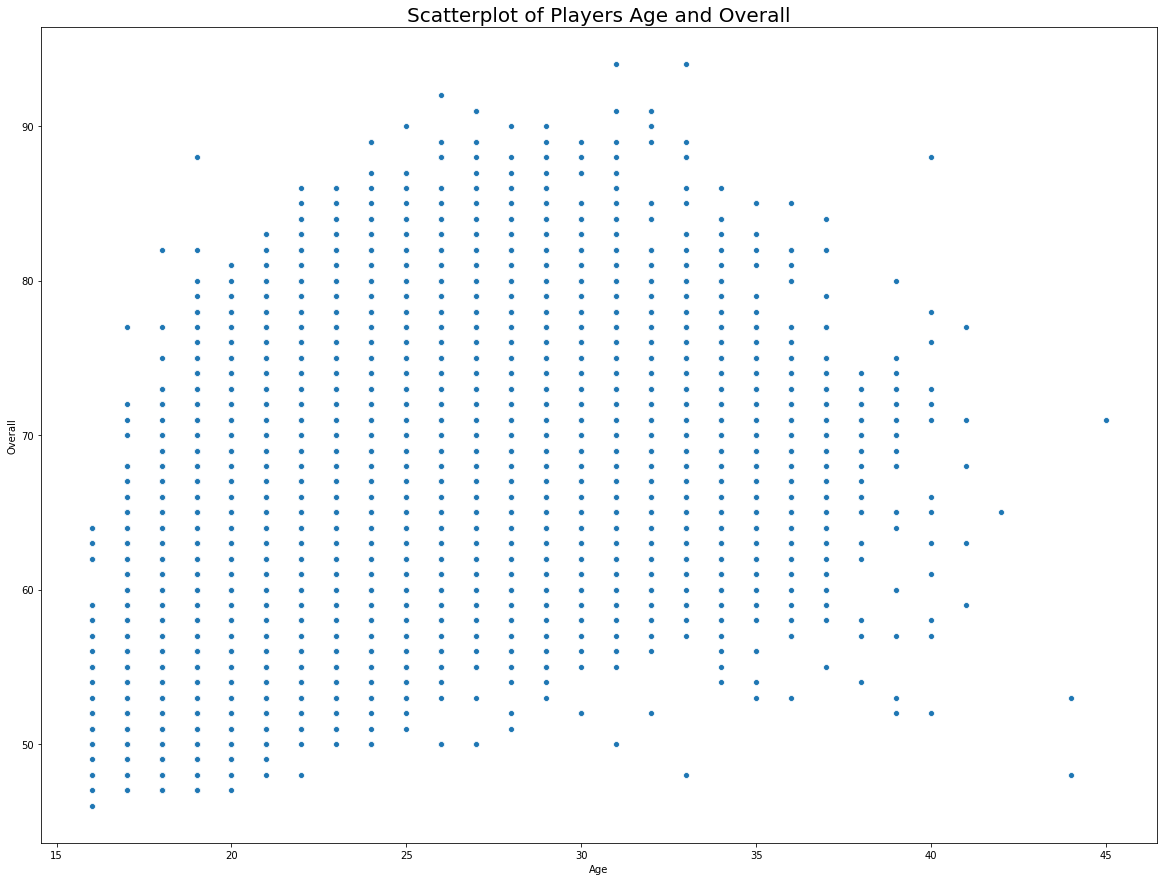

In [20]:
sb.scatterplot(fifa['Age'], fifa['Overall'])
plt.title('Scatterplot of Players Age and Overall', size = 20)

## Country & Club Analysis

In [21]:
#Total number of countries
print('Total number of countries : {}' .format(fifa['Nationality'].nunique()))

Total number of countries : 164


In [22]:
#Count of players from each country
fifa['Nationality'].value_counts()

England        1662
Germany        1198
Spain          1072
Argentina       937
France          914
               ... 
Andorra           1
Botswana          1
South Sudan       1
Ethiopia          1
Malta             1
Name: Nationality, Length: 164, dtype: int64

In [23]:
fifa['Nationality'].value_counts().head(10)

England        1662
Germany        1198
Spain          1072
Argentina       937
France          914
Brazil          827
Italy           702
Colombia        618
Japan           478
Netherlands     453
Name: Nationality, dtype: int64

These are the top 10 countries that have the maximum number of players.

In [24]:
#Total number of clubs
print('Total number of clubs: {}' .format(fifa['Club'].nunique()))

Total number of clubs: 651


In [25]:
fifa['Club'].value_counts()

Valencia CF            33
Tottenham Hotspur      33
Southampton            33
Atlético Madrid        33
RC Celta               33
                       ..
Botafogo               20
Ceará Sporting Club    20
Sligo Rovers           19
Limerick FC            19
Derry City             18
Name: Club, Length: 651, dtype: int64

Highest number of players the club has is 33 and the least number of players the club has is 18.

In [26]:
fifa['Club'].value_counts().head(100)

Valencia CF          33
Tottenham Hotspur    33
Southampton          33
Atlético Madrid      33
RC Celta             33
                     ..
Carpi                30
FC Emmen             30
Reading              30
FC Ingolstadt 04     30
Le Havre AC          30
Name: Club, Length: 100, dtype: int64

More than 100 clubs have the squad of above 30 players.

## Preferred Foot Analysis

In [27]:
fifa['Preferred Foot'].value_counts()

Right    13948
Left      4211
Name: Preferred Foot, dtype: int64

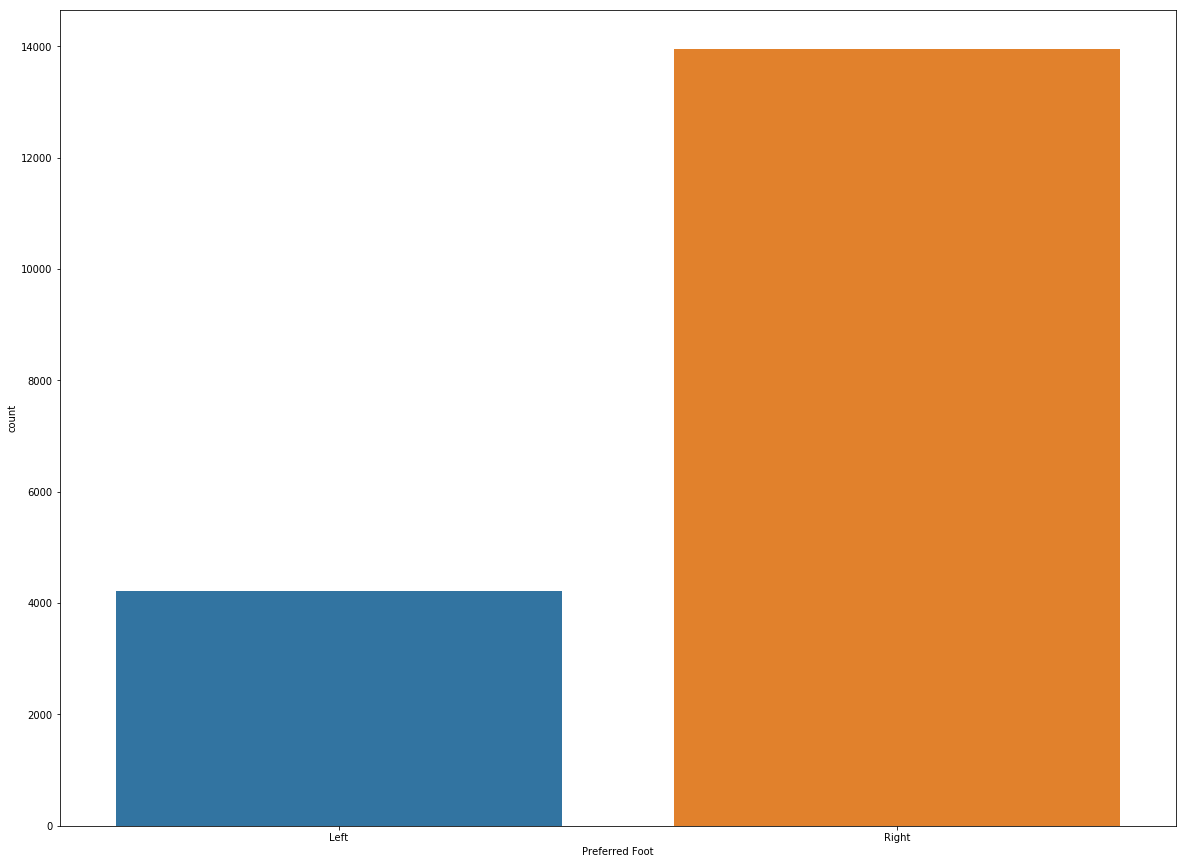

In [28]:
sb.countplot(fifa['Preferred Foot'])

From the above chart I can say Right Footed players are more in number when compared to Left Footed i.e almost 3 times the number of Left Footed.

In [29]:
#Top 5 Left Footed Players
fifa[fifa['Preferred Foot'] == 'Left'][['Name','Overall']].head()

,Name,Overall
0,L. Messi,94
13,David Silva,90
15,P. Dybala,89
17,A. Griezmann,89
19,T. Courtois,89


In [30]:
#Top 5 Right Footed Players
fifa[fifa['Preferred Foot'] == 'Right'][['Name','Overall']].head()

,Name,Overall
1,Cristiano Ronaldo,94
2,Neymar Jr,92
3,De Gea,91
4,K. De Bruyne,91
5,E. Hazard,91


## Overall Analysis for Club & Country

In [31]:
#Top 10 Countries
fifa.groupby(['Nationality'])['Overall'].max().sort_values(ascending = False).head(10)

Nationality
Portugal     94
Argentina    94
Brazil       92
Spain        91
Belgium      91
Uruguay      91
Croatia      91
Poland       90
Germany      90
Slovenia     90
Name: Overall, dtype: int64

Text(0.5, 1.0, 'Player Overall distribution in Top Nations')

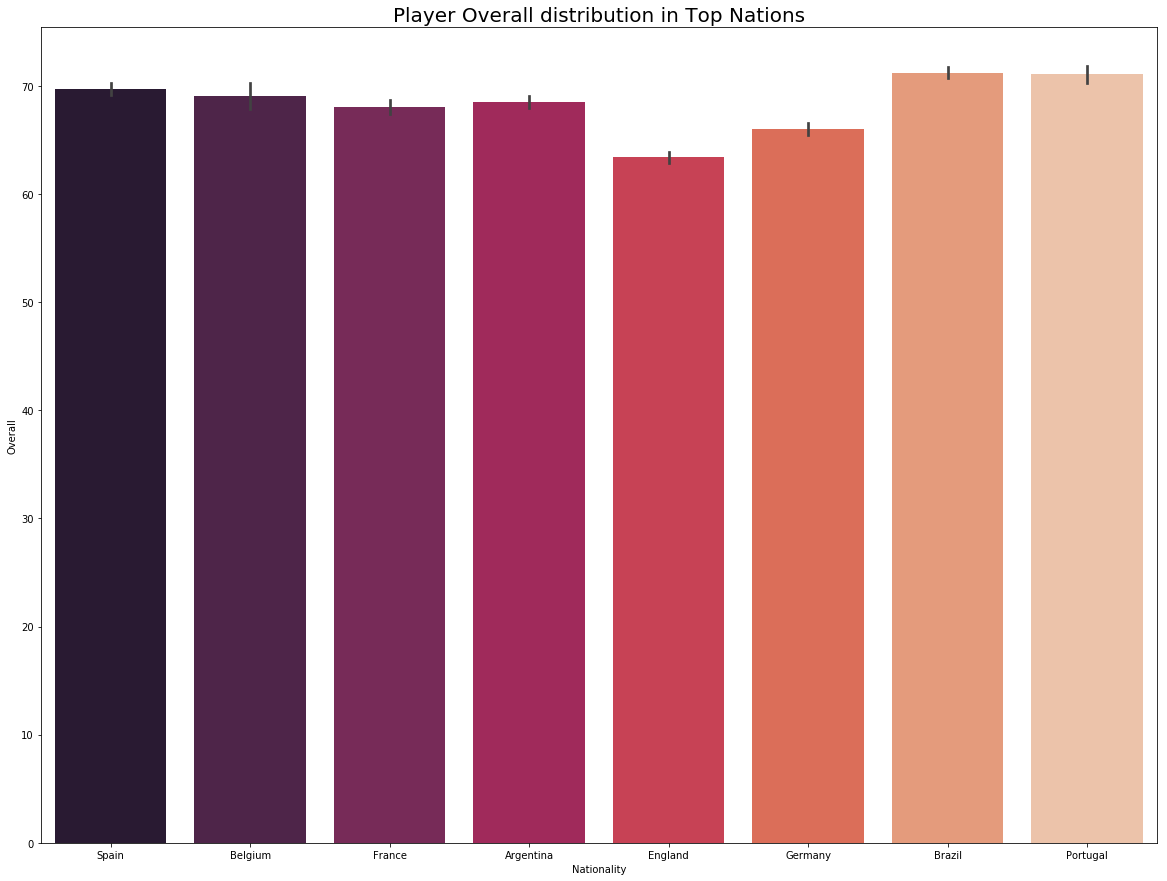

In [32]:
nations = ('Brazil', 'Argentina', 'Portugal', 'England', 'Germany', 'France', 'Belgium', 'Spain')
fifa_nations = fifa.loc[fifa['Nationality'].isin(nations) & fifa['Overall']]

sb.barplot(x = fifa_nations['Nationality'], y = fifa_nations['Overall'], palette = 'rocket')
plt.title(label='Player Overall distribution in Top Nations', size=20)

In [33]:
#Top 10 Clubs
fifa.groupby(['Club'])['Overall'].max().sort_values(ascending = False).head(10)

Club
Juventus               94
FC Barcelona           94
Paris Saint-Germain    92
Manchester City        91
Chelsea                91
Real Madrid            91
Manchester United      91
Atlético Madrid        90
FC Bayern München      90
Tottenham Hotspur      89
Name: Overall, dtype: int64

Text(0.5, 1.0, 'Player Overall distribution in Top Clubs')

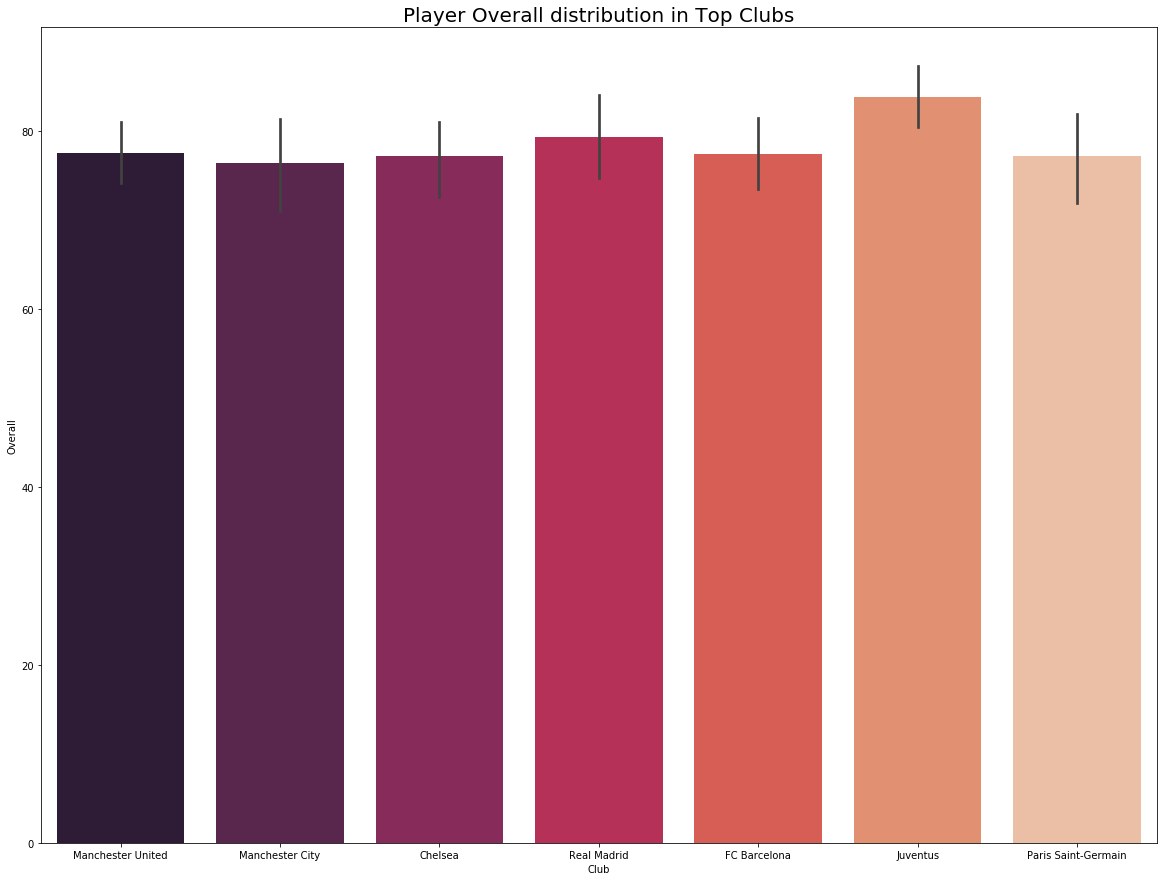

In [34]:
clubs = ('Juventus', 'Real Madrid', 'FC Barcelona', 'Chelsea', 'Manchester United', 'Paris Saint-Germain', 'Manchester City')
fifa_club = fifa.loc[fifa['Club'].isin(clubs) & fifa['Overall']]

sb.barplot(x = fifa_club['Club'], y = fifa_club['Overall'], palette = 'rocket')
plt.title(label='Player Overall distribution in Top Clubs', size=20)

# Modelling

In [35]:
fifa = pd.read_csv('/kaggle/input/fifa19/data.csv')
fifa.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [36]:
#Dropping unnecessary values 
drop_cols = fifa.columns[28:54]
fifa = fifa.drop(drop_cols, axis = 1)
fifa = fifa.drop(['Unnamed: 0','ID','Photo','Flag','Club Logo','Jersey Number','Joined','Special','Loaned From','Body Type', 'Release Clause',
               'Weight','Height','Contract Valid Until','Wage','Value','Name','Club'], axis = 1)
fifa = fifa.dropna()
fifa.head()

,Age,Nationality,Overall,Potential,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Real Face,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,31,Argentina,94,94,Left,5.0,4.0,4.0,Medium/ Medium,Yes,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,33,Portugal,94,94,Right,5.0,4.0,5.0,High/ Low,Yes,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,26,Brazil,92,93,Right,5.0,5.0,5.0,High/ Medium,Yes,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,27,Spain,91,93,Right,4.0,3.0,1.0,Medium/ Medium,Yes,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,27,Belgium,91,92,Right,4.0,5.0,4.0,High/ High,Yes,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


### Converting values for modelling

In [37]:
#Converting Real Face into values
def face_to_num(fifa):
    if(fifa['Real Face'] == 'Yes'):
        return 1
    else:
        return 0

In [38]:
#Converting Preferred foot record to values
def foot(fifa):
    if(fifa['Preferred Foot'] == 'Right'):
        return 1
    else:
        return 0

In [39]:
#Creating a simplified position variable by combining diff positions
def simple_position(fifa):
    if (fifa['Position'] == 'GK'):
        return 'GK'
    elif ((fifa['Position'] == 'RB') or (fifa['Position'] == 'LB') or (fifa['Position'] == 'CB') or (fifa['Position'] == 'LCB') or (fifa['Position'] == 'RCB') or (fifa['Position'] == 'RWB') or (fifa['Position'] == 'LWB')):
        return 'DF'
    elif ((fifa['Position'] == 'LDM') or (fifa['Position'] == 'CDM') or (fifa['Position'] == 'RDM')):
        return 'DM'
    elif ((fifa['Position'] == 'LM') or (fifa['Position'] == 'LCM') or (fifa['Position'] == 'CM') or (fifa['Position'] == 'RCM') or (fifa['Position'] == 'RM')):
        return 'MF'
    elif ((fifa['Position'] == 'LAM') or (fifa['Position'] == 'CAM') or (fifa['Position'] == 'RAM') or (fifa['Position'] == 'LW') or (fifa['Position'] == 'RW')):
        return 'AM'
    elif ((fifa['Position'] == 'RS') or (fifa['Position'] == 'ST') or (fifa['Position'] == 'LS') or (fifa['Position'] == 'CF') or (fifa['Position'] == 'LF') or (fifa['Position'] == 'RF')):
        return 'ST'
    else:
        return fifa.Position

In [40]:
#Making list of those nations with more then 250 players
nat_count = fifa.Nationality.value_counts()
nat_list = nat_count[nat_count > 250].index.tolist()

def major_nation(fifa):
    if(fifa.Nationality in nat_list):
        return 1
    else:
        return 0

In [41]:
#Creating a copy to avoid indexing error
fifa1 = fifa.copy()

In [42]:
#Applying changes to dataset to create new columns
fifa1['Real_Face'] = fifa1.apply(face_to_num, axis = 1)
fifa1['Right_Footed'] = fifa1.apply(foot, axis = 1)
fifa1['Simple_Position'] = fifa1.apply(simple_position, axis = 1)
fifa1['Nation'] = fifa1.apply(major_nation, axis = 1)

In [43]:
#Splitting the Team Work column
tempwork = fifa1['Work Rate'].str.split('/', n = 1, expand = True)

fifa1['Workrate1'] = tempwork[0]
fifa1['Workrate2'] = tempwork[1]

In [44]:
#Droping the original columns
fifa1 = fifa1.drop(['Work Rate', 'Preferred Foot', 'Real Face', 'Position', 'Nationality'], axis = 1)
fifa1.head()

,Age,Overall,Potential,International Reputation,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,ShortPassing,...,GKHandling,GKKicking,GKPositioning,GKReflexes,Real_Face,Right_Footed,Simple_Position,Nation,Workrate1,Workrate2
0,31,94,94,5.0,4.0,4.0,84.0,95.0,70.0,90.0,...,11.0,15.0,14.0,8.0,1,0,ST,1,Medium,Medium
1,33,94,94,5.0,4.0,5.0,84.0,94.0,89.0,81.0,...,11.0,15.0,14.0,11.0,1,1,ST,1,High,Low
2,26,92,93,5.0,5.0,5.0,79.0,87.0,62.0,84.0,...,9.0,15.0,15.0,11.0,1,1,AM,1,High,Medium
3,27,91,93,4.0,3.0,1.0,17.0,13.0,21.0,50.0,...,85.0,87.0,88.0,94.0,1,1,GK,1,Medium,Medium
4,27,91,92,4.0,5.0,4.0,93.0,82.0,55.0,92.0,...,13.0,5.0,10.0,13.0,1,1,MF,1,High,High


In [45]:
#Spliting ID
target = fifa1.Overall
fifa2 = fifa1.drop(['Overall'], axis = 1)

In [46]:
#Splitting dataset for training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(fifa2, target, test_size = 0.2, random_state = 0)

x_train = pd.get_dummies(x_train)
x_test = pd.get_dummies(x_test)

In [47]:
from sklearn.ensemble import RandomForestRegressor
random = RandomForestRegressor()
random.fit(x_train, y_train)
y_pred = random.predict(x_test)

In [48]:
from sklearn.metrics import r2_score
print('R2 score: '+str(r2_score(y_test, y_pred)))

R2 score: 0.9712688785827005
